In [1]:
print("Nearest Neighbors")

Nearest Neighbors


### Fundamentals of Nearest Neighbor
- These are non-generalizing learning models .i.e simply stores all the training data.
- Stores data into fast access data structure like Ball Tree & KD Tree
- The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label/value from these.
- The number of samples can be a user-defined constant or configured radius
Very useful when decision boundry is very irregular.
#### 1. Unsupervised Nearest Neighbor
- Based on the algorithm configured training data is stored
- For an unknown data, return the shortest Euclidean distance between configured k
- Euclidean distance is calculated as the square root of the sum of the squared differences between a new point (x) and an existing point (xi) across all input attributes j.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.neighbors import NearestNeighbors

In [4]:
nn = NearestNeighbors(n_neighbors=2, algorithm='ball_tree')

In [5]:
from sklearn.datasets import make_blobs

In [6]:
X,_ = make_blobs(n_features=2, n_samples=10, cluster_std=5)

In [7]:
plt.scatter(X[:,0], X[:,1], s=10,alpha=.5)
plt.scatter([5],[5])

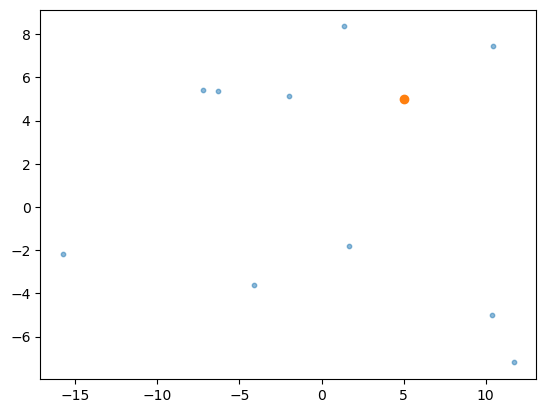

In [8]:
plt.show()

In [9]:
nn.fit(X)

NearestNeighbors(algorithm='ball_tree', n_neighbors=2)

In [10]:
nn.kneighbors([[5,5]])

(array([[4.94408217, 5.98503353]]), array([[8, 0]], dtype=int64))

In [11]:
_,X_nearest = nn.kneighbors([[5,5]])

In [12]:
nearest = X[X_nearest[0]]

In [13]:
X_nearest

array([[8, 0]], dtype=int64)

In [18]:
plt.scatter(X[:,0], X[:,1], s=10,alpha=.5)
plt.scatter(nearest[:,0], nearest[:,1], s=10 ,cmap='virdis')
#plt.colorbar(label='Color Intensity')
plt.scatter([5],[5])

C:\Users\PC\AppData\Local\Temp\ipykernel_12240\880072196.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(nearest[:,0], nearest[:,1], s=10 ,cmap='virdis')


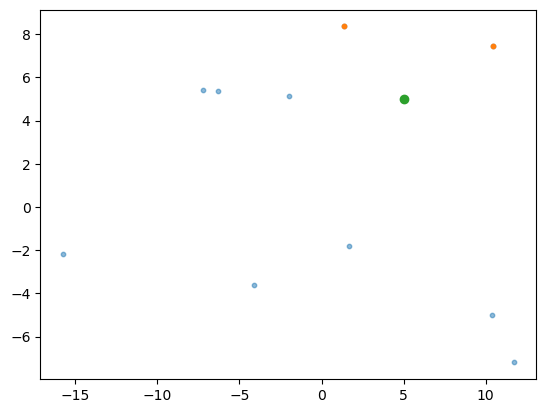

In [19]:
plt.show()

### 2. Nearest Neighbors for Classification
- A query point is assigned the data class which has the most representatives within the nearest neighbors of the point.
- Two types of nearest neighbor classifier
- KNeighboursClassifier ( based on configured k )
- RadiusNeighbourClassifier ( based on configured r )
- Weights can be ‘uniform’ or ‘distance’. It assigns weights proportional to the inverse of the distance from the query point.

In [20]:
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier

In [21]:
knc = KNeighborsClassifier(n_neighbors=5)
rnc = RadiusNeighborsClassifier(radius=5)

In [22]:
X,Y = make_blobs(n_features=2, n_samples=50, cluster_std=5, centers=2)

In [23]:
plt.scatter(X[:,0], X[:,1], s=50,alpha=.5, c=Y, cmap='winter')
plt.scatter([5],[-5],c='r')

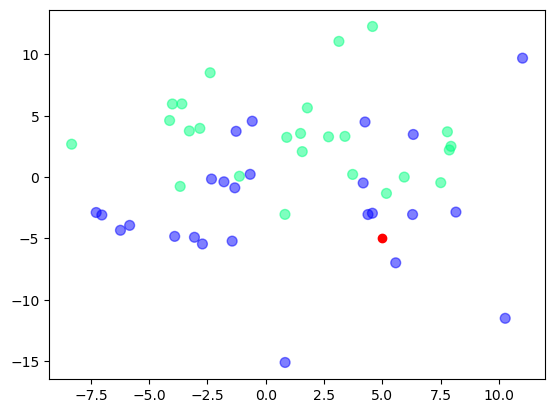

In [24]:
plt.show()

In [25]:
knc.fit(X,Y)
rnc.fit(X,Y)

RadiusNeighborsClassifier(radius=5)

In [26]:
knc_pred = knc.predict([[5,-5]])

In [27]:
knc_pred

array([0])

In [28]:
knc.kneighbors([[5,-5]])

(array([[2.04208473, 2.07391303, 2.09616307, 2.34001137, 3.67326602]]),
 array([[42, 41, 27, 34, 44]], dtype=int64))

In [29]:
_, knc_neighbors = knc.kneighbors([[5,-5]])

In [30]:
knc_neighbors

array([[42, 41, 27, 34, 44]], dtype=int64)

In [31]:
rnc_pred = rnc.predict([[5,-5]])

In [32]:
rnc_pred

array([0])

In [33]:
rnc.radius_neighbors([[5,-5]])

(array([array([4.61162251, 4.59249663, 2.09616307, 2.34001137, 2.07391303,
               2.04208473, 3.67326602, 3.81584229])                       ],
       dtype=object),
 array([array([20, 25, 27, 34, 41, 42, 44, 46], dtype=int64)], dtype=object))

In [34]:
_, rnc_neighbors = rnc.radius_neighbors([[5,-5]])

In [35]:
rnc_neighbors[0]

array([20, 25, 27, 34, 41, 42, 44, 46], dtype=int64)

### Visualizing for NearestNeighbourClassifier

In [36]:
nearest = X[knc_neighbors[0]]
plt.scatter(X[:,0], X[:,1], s=50,alpha=.5, c=Y, cmap='winter')
plt.scatter([5],[-5],c='r')
plt.scatter(nearest[:,0], nearest[:,1], s=10, c='k')

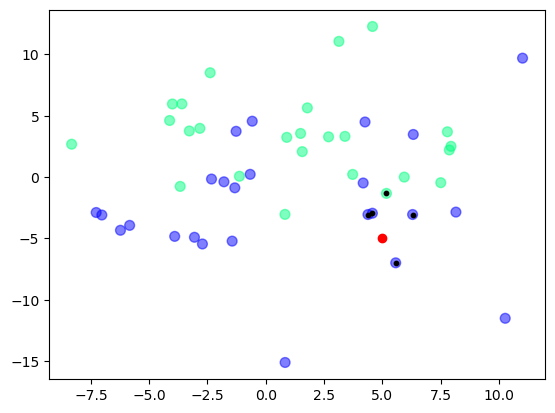

In [37]:
plt.show()

### Visualizing for RadiusNeighbourClassifier

In [38]:
nearest = X[rnc_neighbors[0]]
plt.scatter(X[:,0], X[:,1], s=50,alpha=.5, c=Y, cmap='winter')
plt.scatter([5],[-5],c='r')
plt.scatter(nearest[:,0], nearest[:,1], s=10, c='k')

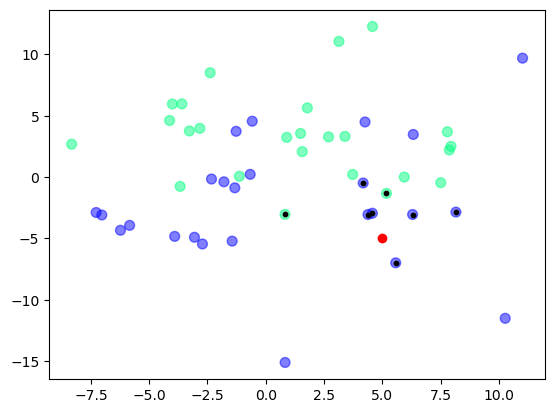

In [39]:
plt.show()

- Understanding weights - Nearer neighbor has more impact when configured with weight='distance' parameter

In [40]:
rnc = RadiusNeighborsClassifier(radius=5, weights='distance')

- Impact of number of neighbors on decision boundry
- Nearest Neighbors (k = 1) or
- 20 nearest neighbors

### 3. Nearest Neighbors for Regression
- The labels of data are continues
- The label assigned to a query point is computed based the mean/medium of the labels of its nearest neighbors.
- Neighbors to be considered can be based on count or radius distance
- KNeighbourRegressor
- RadiusNeighbourRegressor
- 'weight' parameter to control impact of neighbor based on closeness
- NearestNeighborRegressor is capable of predicting mutiple outputs

In [42]:
from sklearn.datasets import fetch_olivetti_faces

In [43]:
faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\PC\scikit_learn_data


In [44]:
targets = faces.target

In [45]:
plt.imshow(faces.images[11], cmap='gray')

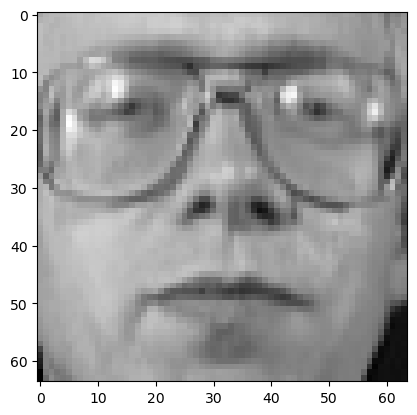

In [46]:
plt.show()

In [47]:
faces.images.shape

(400, 64, 64)

In [48]:
faces.data.shape

(400, 4096)

In [49]:
train = faces.data[targets < 30]
test = faces.data[targets >= 30]

In [50]:
plt.imshow(train[0][:2048].reshape(32,64))

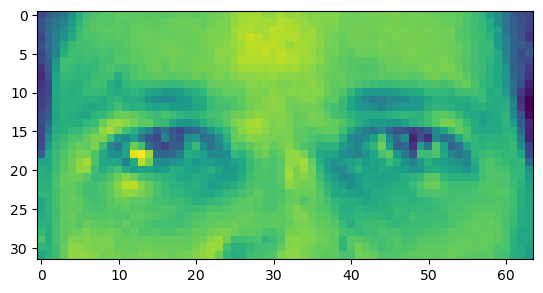

In [51]:
plt.show()

In [52]:
trainX = train[:,:2048]
trainY = train[:,2048:]
testX = test[:,:2048]
testY = test[:,2048:]

In [53]:
from sklearn.neighbors import KNeighborsRegressor

In [54]:
nn_r = KNeighborsRegressor(n_neighbors=20,weights='distance', n_jobs=-1)

In [55]:
nn_r.fit(trainX,trainY)

KNeighborsRegressor(n_jobs=-1, n_neighbors=20, weights='distance')

In [56]:
sample = testX[::10]

In [57]:
res = nn_r.predict(sample)

In [58]:
final = np.hstack([sample,res])

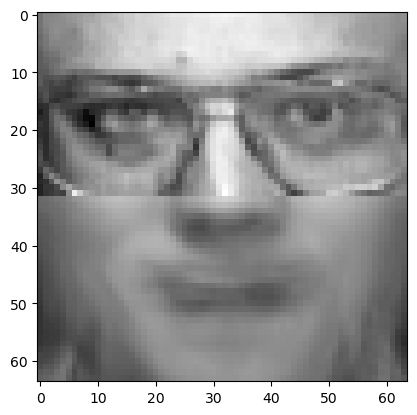

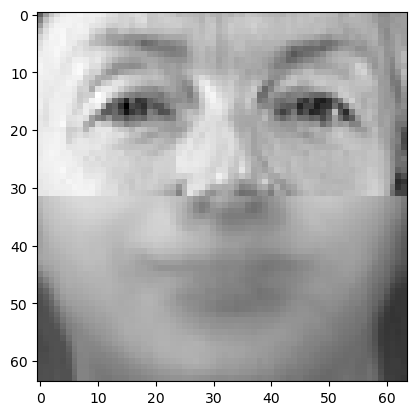

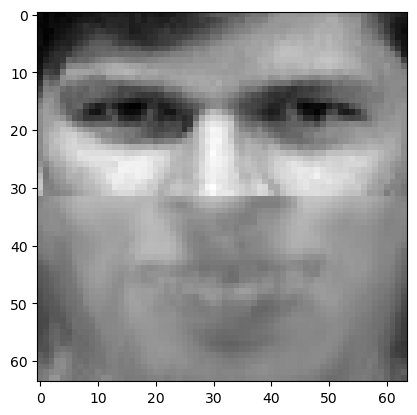

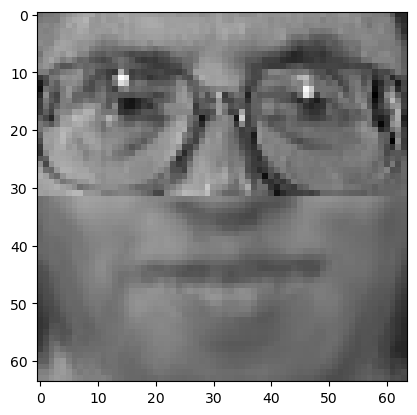

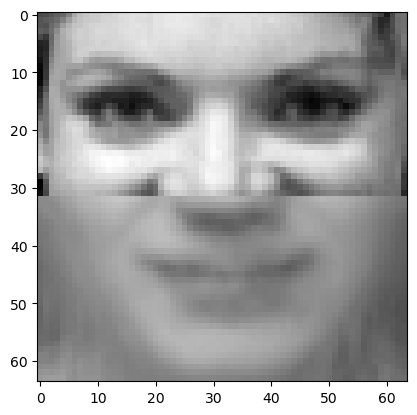

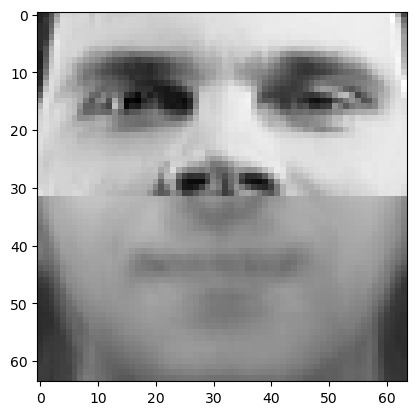

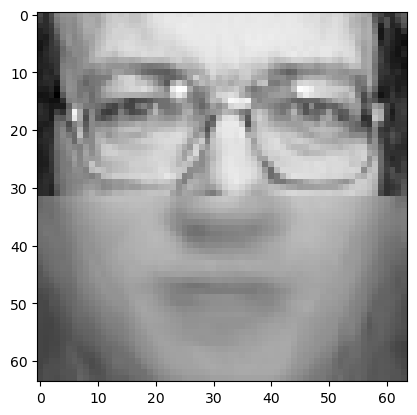

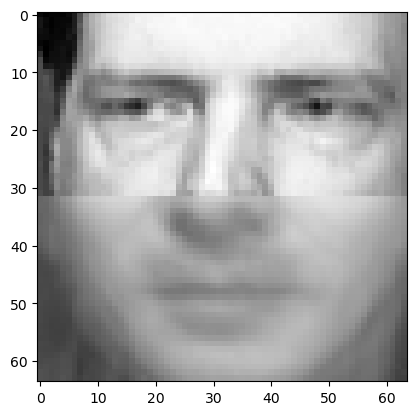

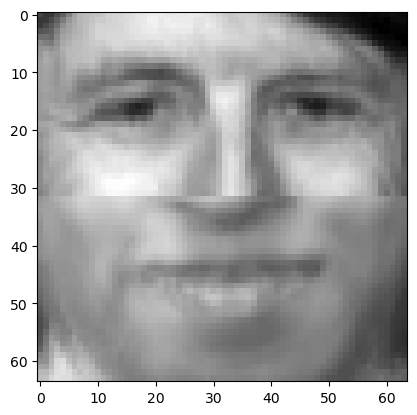

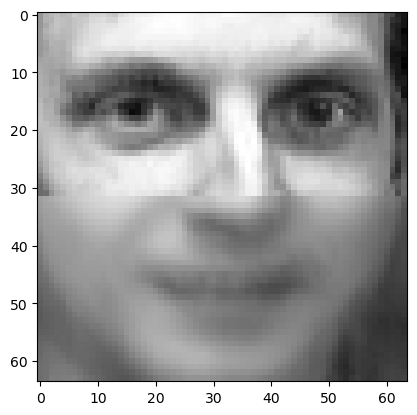

In [59]:
for img in final:
    plt.imshow(img.reshape(64,64), cmap='gray')
    plt.show()

### 4. Nearest Centroid Classifier
- Used for classification
- Computes the centroid for each class.
- Measures the distance ( generally Euclidean ) of the data point X to the centroid of each class.
- If the distance is of X and the centroid of a particular class is minimum then it assigns that class to the data point X ( The argmin statement in the picture you have provided ) i.e Y predicts the centroid closest to the point X
- It's different from KMeans, since KMeans identifies the clusters & here we assign data to cluster

In [61]:
#from sklearn.neighbors.nearest_centroid import NearestCentroid deplicted
from sklearn.neighbors import NearestCentroid


In [62]:
from sklearn.datasets import load_iris

In [63]:
iris = load_iris()

In [64]:
nc = NearestCentroid()

In [65]:
nc.fit(iris.data, iris.target)

NearestCentroid()

In [66]:
nc.score(iris.data, iris.target)

0.9266666666666666